In [323]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')
import cv2


from scipy.fftpack import fft
from timeit import default_timer as timer
from math import sqrt
import pandas as pd
import trackpy as tp
from matplotlib import cm
pixel=7
micron=33.7
mpp=micron/pixel
mpp

from pandas import DataFrame, Series  # for convenience

import pims
import numpy as np

In [324]:
pixel=7
micron=33.7
mpp=micron/pixel
mpp
fps=250
cut=2
hz=0.5

period=int(fps/cut*(1/hz))
period

250

In [325]:
import pathlib
pathlib.Path().absolute()

PosixPath('/Users/yongdou/Dropbox/track')

In [326]:
#frames=pims.Video('20d02.avi')
d0=pd.read_csv("/Users/yongdou/Downloads/track/02082020/numerical702/0d0.5hz250fps.csv")

In [228]:
plt.imshow(frames[0])

NameError: name 'frames' is not defined

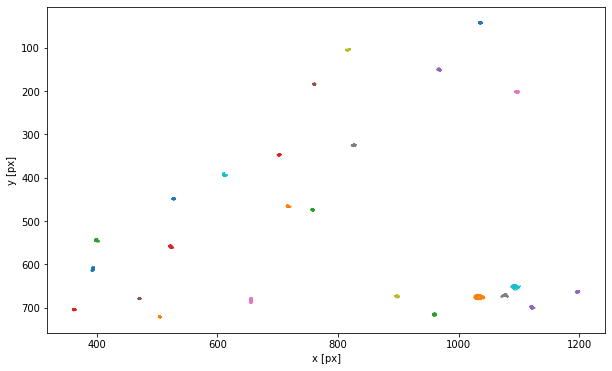

In [327]:
plt.figure()
tp.plot_traj(d0);

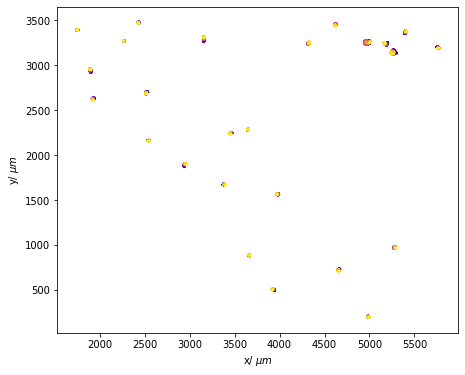

In [328]:
fig, ax = plt.subplots()

for i in list(set(d0["particle"])):
    d0i=d0[d0["particle"]==i]
    head=d0i['frame'].values[0]
    tail=d0i['frame'].values[-1]
    color=(d0i['frame'].values-head)/(tail-head)
    plt.scatter(d0i['x']*mpp,d0i['y']*mpp,linewidth=1,c=cm.plasma(color),s=0.2)
    #plt.plot(d0i['x'],d0i['y'],linewidth=1)
#plt.xlim(200,400)
#plt.ylim(0,200)
#plt.imshow(frames[0])
plt.xlabel(r'x/ $\mu m$')
plt.ylabel(r'y/ $\mu m$')
ax.set_aspect('equal')


#plt.plot(t_20_1['x'],t_20_1['y'],linewidth=0.8,c=cm.plasma(0.2),label="20Hz")

In [329]:
set(d0["particle"])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 28}

In [330]:
partilcenumber=8
particle1=d0[d0["particle"]==partilcenumber]

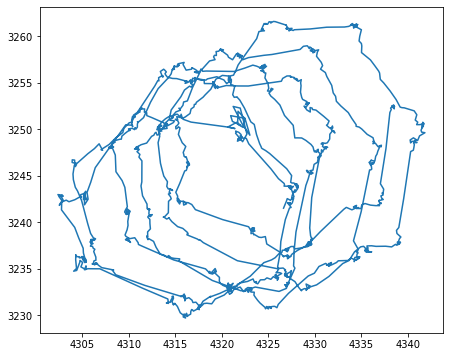

In [331]:
fig, ax = plt.subplots()
plt.plot(particle1['x']*mpp,particle1['y']*mpp)
ax.set_aspect('equal')

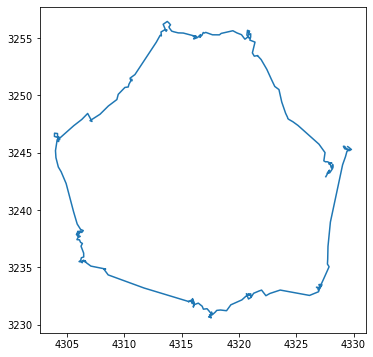

In [332]:
n=1

fig, ax = plt.subplots()
plt.plot(particle1['x'][period*n:period*(n+1)]*mpp,particle1['y'][period*n:period*(n+1)]*mpp)
ax.set_aspect('equal')

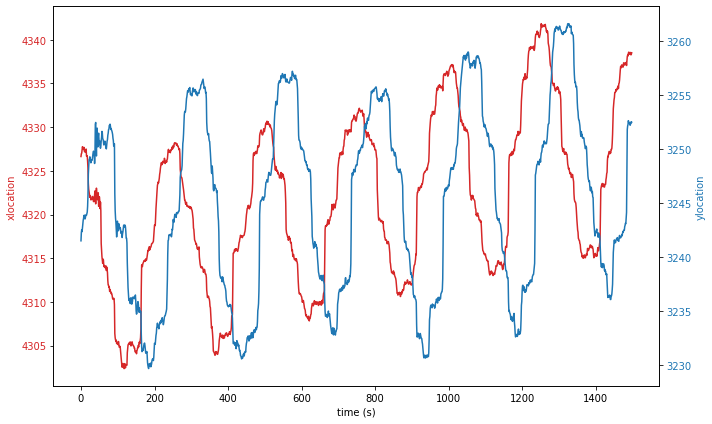

In [333]:
# Create some mock data


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('xlocation', color=color)
ax1.plot(particle1['x'].values*mpp, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ylocation', color=color)  # we already handled the x-label with ax1
ax2.plot(particle1['y'].values*mpp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [334]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [335]:


dates = np.arange(len(particle1['x'].values*mpp))
datay = particle1['y'].values*mpp
datax = particle1['x'].values*mpp
dfy = pd.DataFrame({'data': datay}, index=dates)
dfx = pd.DataFrame({'data': datax}, index=dates)

# Reproduce the example in OP
resultx=seasonal_decompose(dfx, model='additive', freq=period)
resulty=seasonal_decompose(dfy, model='additive', freq=period)
####
observex=resultx.observed
seasonx=resultx.seasonal
trendx=resultx.trend
resx=resultx.resid
#####
observey=resulty.observed
seasony=resulty.seasonal
trendy=resulty.trend
resy=resulty.resid


Text(0, 0.5, 'Residual')

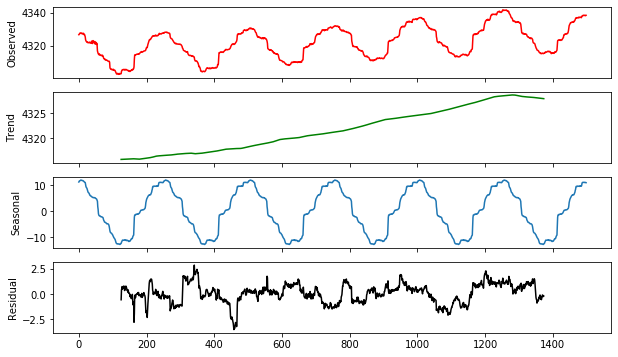

In [345]:
fig, axes = plt.subplots(4, 1, sharex=True)

resultx.observed.plot(ax=axes[0], legend=False, color='r')
axes[0].set_ylabel('Observed')
resultx.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
resultx.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
resultx.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')

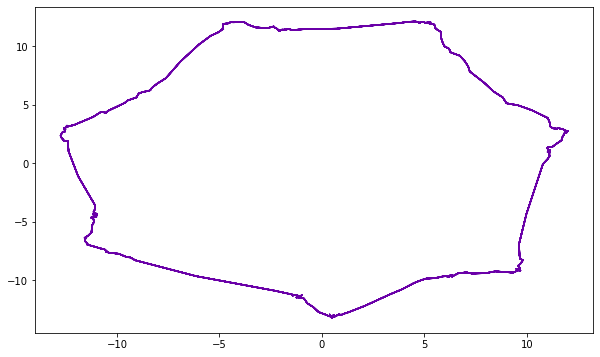

In [338]:
plt.plot(seasonx.values,seasony.values,c=cm.plasma(0.2))